In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_sensors = pd.read_csv('./data/GoogleGlass/1101/1101_sensorData.csv')

In [3]:
df_annotation = pd.read_csv('./data/GoogleGlass/1101/1101_annotate.csv')

In [4]:
df_sensors.head(10)

,Unix Time,Sensor,Value1,Value2,Value3
0,1405958662457,MPL Magnetic Field,31.533203,-19.916935,-22.601723
1,1405958662459,MPL Rotation Vector,0.462228,-0.480602,-0.490234
2,1405958662553,MPL Linear Acceleration,0.042048,-0.291195,0.021697
3,1405958662576,MPL Gravity,0.860416,9.706243,1.102979
4,1405958662612,MPL Gyroscope,-0.026058,-0.004421,0.003323
5,1405958662614,MPL Accelerometer,0.830788,9.556456,1.069011
6,1405958662672,MPL Magnetic Field,31.963910,-19.440687,-23.540876
7,1405958662674,MPL Rotation Vector,0.460899,-0.480405,-0.490730
8,1405958662768,MPL Linear Acceleration,0.007931,-0.296881,0.020500
9,1405958662799,MPL Gravity,0.862362,9.704747,1.114800


In [5]:
df_sensors['Unix Time'] = pd.to_datetime(df_sensors['Unix Time'], unit='ms')
df_sensors.set_index('Unix Time')

,Sensor,Value1,Value2,Value3
Unix Time,,,,
2014-07-21 16:04:22.457,MPL Magnetic Field,31.533203,-19.916935,-22.601723
2014-07-21 16:04:22.459,MPL Rotation Vector,0.462228,-0.480602,-0.490234
2014-07-21 16:04:22.553,MPL Linear Acceleration,0.042048,-0.291195,0.021697
2014-07-21 16:04:22.576,MPL Gravity,0.860416,9.706243,1.102979
2014-07-21 16:04:22.612,MPL Gyroscope,-0.026058,-0.004421,0.003323
...,...,...,...,...
2014-07-21 18:07:30.890,MPL Accelerometer,0.408211,9.539697,0.353145
2014-07-21 18:07:30.892,MPL Magnetic Field,10.990790,-28.284224,-19.397615
2014-07-21 18:07:30.894,MPL Rotation Vector,0.694823,-0.044986,-0.020579


In [6]:
df_sensors['Unix Time'].nunique()

129270

<AxesSubplot:>

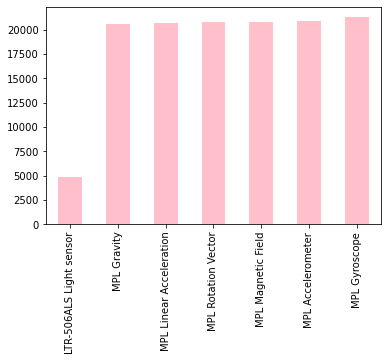

In [7]:
df_sensors['Sensor'].value_counts().sort_values().plot(kind = 'bar', color = 'pink')


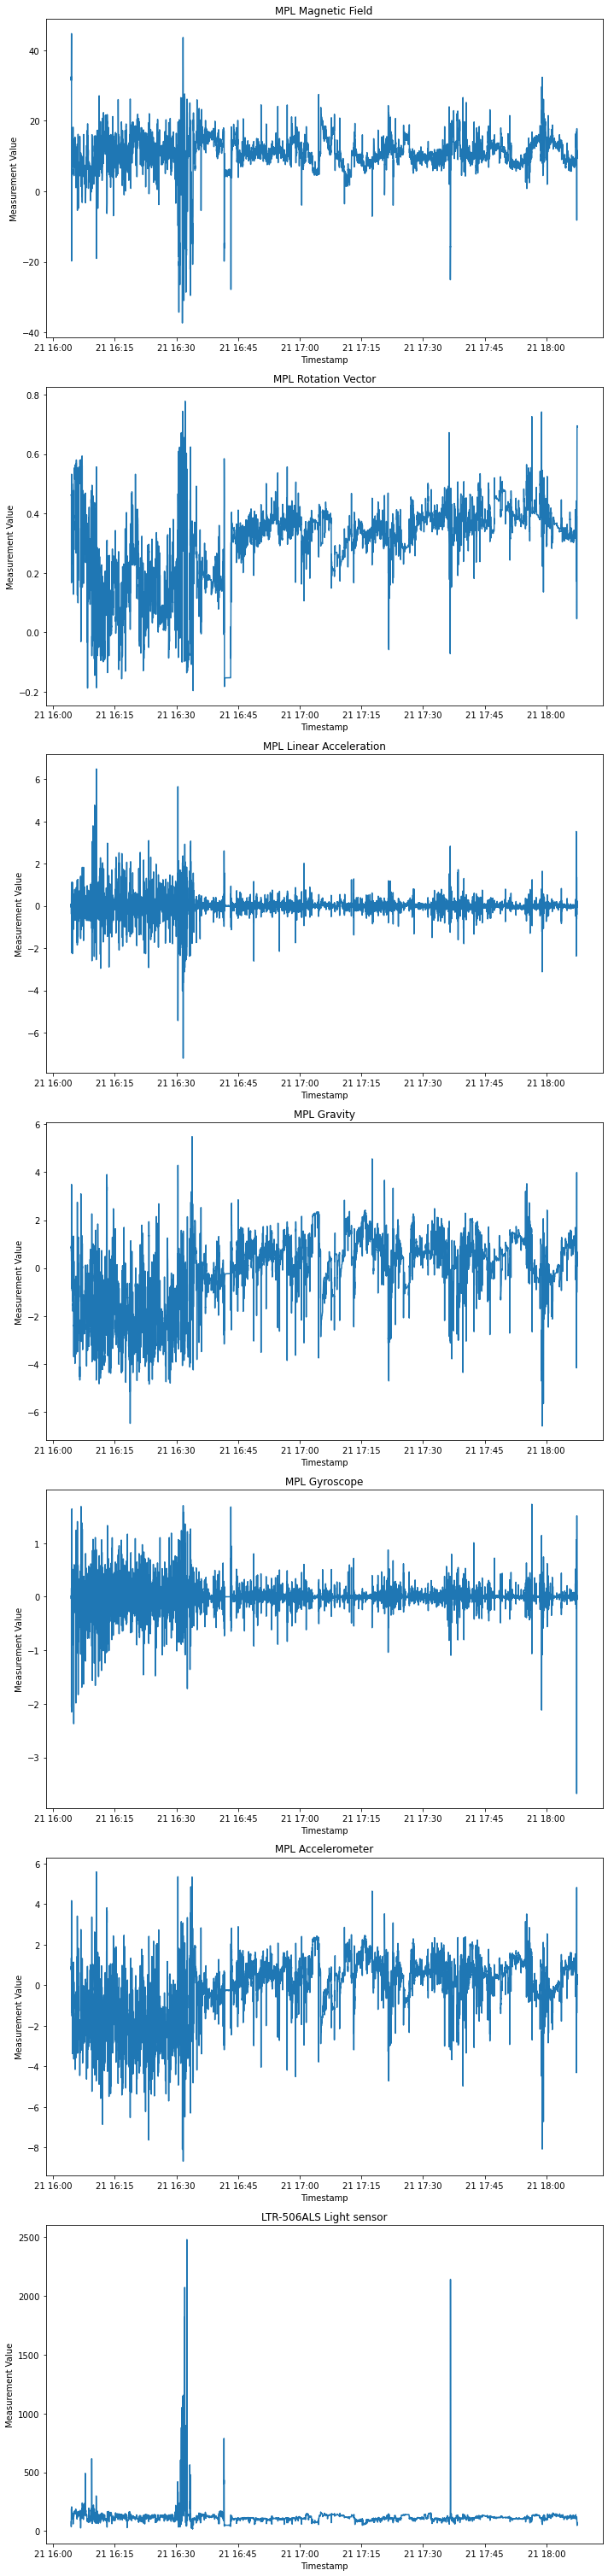

In [8]:
# Get unique sensors
sensors = df_sensors['Sensor'].unique()

# Create subplots for each sensor
fig, axes = plt.subplots(nrows=len(sensors), ncols=1, figsize=(10, 6 * len(sensors)))

# Plot measurements for each sensor
for idx, sensor in enumerate(sensors):
    sensor_df = df_sensors[df_sensors['Sensor'] == sensor]
    axes[idx].plot(sensor_df['Unix Time'], sensor_df['Value1'])
    axes[idx].set_title(sensor)
    axes[idx].set_xlabel('Timestamp')
    axes[idx].set_ylabel('Measurement Value')

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks
from scipy.fftpack import fft

def calculate_intensity(data):
    return np.sum(data ** 2)

def calculate_variance(data):
    return np.var(data)

def calculate_skewness(data):
    return skew(data)

def calculate_kurtosis(data):
    return kurtosis(data)

def calculate_crest_factor(data):
    rms = np.sqrt(np.mean(data ** 2))
    peak_value = np.max(np.abs(data))
    return peak_value / rms

def calculate_spectral_centroid(data, sampling_rate):
    spectrum = np.fft.fft(data)
    freq = np.fft.fftfreq(len(spectrum), d=1/sampling_rate)
    return np.sum(freq * np.abs(spectrum)) / np.sum(np.abs(spectrum))

def calculate_flux(data):
    return np.sum(np.diff(data) ** 2)

def calculate_roll_off(data, percentage=0.85):
    spectrum = np.fft.fft(data)
    cum_energy = np.cumsum(np.abs(spectrum) ** 2) / np.sum(np.abs(spectrum) ** 2)
    roll_off_index = np.argmax(cum_energy >= percentage)
    return roll_off_index / len(spectrum)

def calculate_delta(data):
    return np.diff(data)

def calculate_delta_delta(data):
    delta = calculate_delta(data)
    return calculate_delta(delta)


In [10]:
# Convert 'timestamp' to datetime
df_sensors['timestamp'] = pd.to_datetime(df_sensors['Unix Time'])
df_sensors.drop('Unix Time', axis=1, inplace=True)
# Set 'timestamp' as the index
df_sensors.set_index('timestamp', inplace=True)

In [11]:
df_sensors.head()

,Sensor,Value1,Value2,Value3
timestamp,,,,
2014-07-21 16:04:22.457,MPL Magnetic Field,31.533203,-19.916935,-22.601723
2014-07-21 16:04:22.459,MPL Rotation Vector,0.462228,-0.480602,-0.490234
2014-07-21 16:04:22.553,MPL Linear Acceleration,0.042048,-0.291195,0.021697
2014-07-21 16:04:22.576,MPL Gravity,0.860416,9.706243,1.102979
2014-07-21 16:04:22.612,MPL Gyroscope,-0.026058,-0.004421,0.003323


In [12]:
# Specify the window size (60 seconds)
window_size = '60S'

# Non-overlapping window function with mean calculation
#result_df = df_sensors.groupby('Sensor').resample(window_size).mean()



# Reset index
#result_df.reset_index(inplace=True)

# Display the result
#result_df.head()

In [13]:
#result_df.pivot(index='timestamp', columns='Sensor')

In [14]:
# Define custom functions
def calculate_intensity(data):
    return np.sum(data ** 2)

def calculate_variance(data):
    return np.var(data)

def calculate_skewness(data):
    return skew(data)

def calculate_kurtosis(data):
    return kurtosis(data)

def calculate_crest_factor(data):
    rms = np.sqrt(np.mean(data ** 2))
    peak_value = np.max(np.abs(data))
    return peak_value / rms

def calculate_spectral_centroid(data, sampling_rate):
    spectrum = np.fft.fft(data)
    freq = np.fft.fftfreq(len(spectrum), d=1/sampling_rate)
    return np.sum(freq * np.abs(spectrum)) / np.sum(np.abs(spectrum))

def calculate_flux(data):
    return np.sum(np.diff(data) ** 2)

def calculate_roll_off(data, percentage=0.85):
    spectrum = np.fft.fft(data)
    cum_energy = np.cumsum(np.abs(spectrum) ** 2) / np.sum(np.abs(spectrum) ** 2)
    roll_off_index = np.argmax(cum_energy >= percentage)
    return roll_off_index / len(spectrum)

def calculate_delta(data):
    return np.diff(data)

def calculate_delta_delta(data):
    delta = calculate_delta(data)
    return calculate_delta(delta)



In [15]:
'''
# Resample and apply multiple custom functions
result_df = df_sensors.groupby('Sensor').resample(window_size).agg({
    'Value1': [
        ('intensity', calculate_intensity)
        #('variance', calculate_variance),
        #('skewness', calculate_skewness),
        #('kurtosis', calculate_kurtosis),
        #('crest_factor', calculate_crest_factor),
        #('spectral_centroid', lambda x: calculate_spectral_centroid(x, 395)),  # Assuming 395 is the sampling rate
        #('flux', calculate_flux),
        #('roll_off', calculate_roll_off),
        #('delta', calculate_delta),
        #('delta_delta', calculate_delta_delta)
    ]
})

# Reset the index to make 'sensor_type' and 'timestamp' regular columns
result_df.reset_index(inplace=True)

# Display the result
print(result_df)
'''

"\n# Resample and apply multiple custom functions\nresult_df = df_sensors.groupby('Sensor').resample(window_size).agg({\n    'Value1': [\n        ('intensity', calculate_intensity)\n        #('variance', calculate_variance),\n        #('skewness', calculate_skewness),\n        #('kurtosis', calculate_kurtosis),\n        #('crest_factor', calculate_crest_factor),\n        #('spectral_centroid', lambda x: calculate_spectral_centroid(x, 395)),  # Assuming 395 is the sampling rate\n        #('flux', calculate_flux),\n        #('roll_off', calculate_roll_off),\n        #('delta', calculate_delta),\n        #('delta_delta', calculate_delta_delta)\n    ]\n})\n\n# Reset the index to make 'sensor_type' and 'timestamp' regular columns\nresult_df.reset_index(inplace=True)\n\n# Display the result\nprint(result_df)\n"

In [16]:
aggregation_functions = [calculate_intensity, calculate_variance, calculate_skewness, calculate_kurtosis, calculate_crest_factor, lambda x: calculate_spectral_centroid(x, 395), calculate_flux, calculate_roll_off, calculate_delta, calculate_delta_delta]

In [17]:
result_df = df_sensors.groupby('Sensor').resample(window_size).agg({'Value1':aggregation_functions, 'Value2':aggregation_functions, 'Value3':aggregation_functions})

In [19]:
result_df.reset_index(inplace=True)


In [24]:
result_df.pivot(index='timestamp', columns='Sensor').columns

AttributeError: 'MultiIndex' object has no attribute 'count'